In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
url = 'https://raw.githubusercontent.com/vinthagunasekhar/breast-cancer-detection-machinelearning/main/data.xlsx'


data = pd.read_excel(url)


print(data.head())
print(data.info())
print(data.describe())

         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760      0.3001          0.14710  ...    25.38     17.33   
1       0.07864      0.0869          0.07017  ...    24.99     23.41   
2       0.15990      0.1974          0.12790  ...    23.57     25.53   
3       0.28390      0.2414          0.10520  ...    14.91     26.50   
4       0.13280      0.1980          0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0  

In [3]:
print(data.isnull().sum()) 

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


In [4]:

data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
data = data.drop(columns=['ID'])


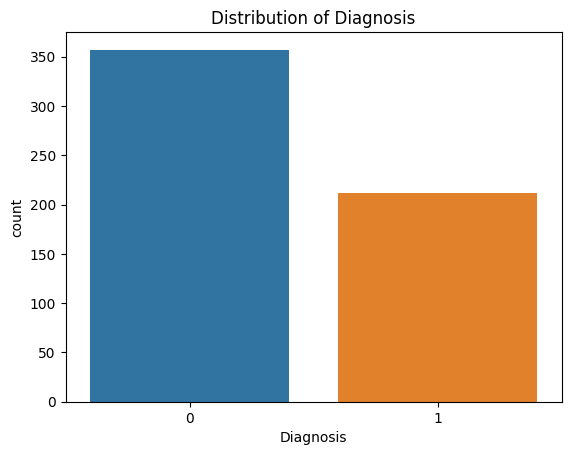

In [5]:
# EDA visuals
sns.countplot(x='Diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

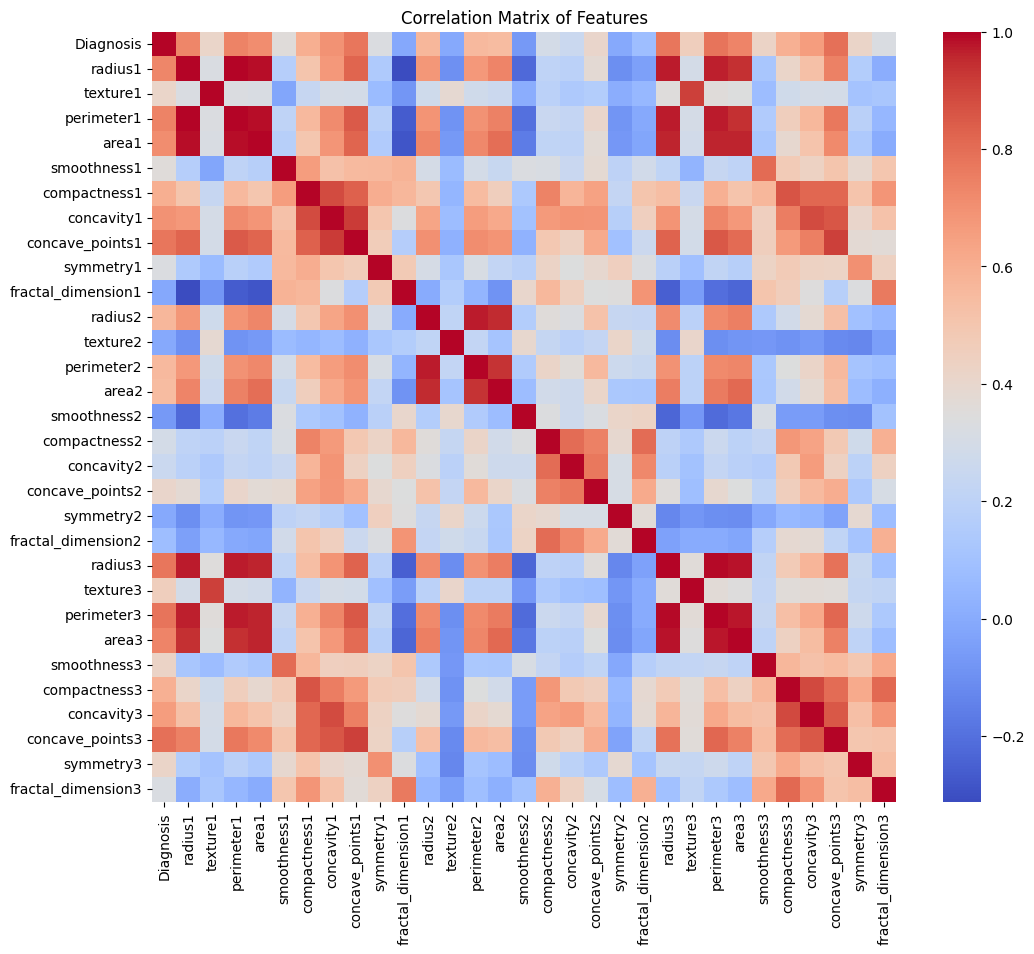

In [6]:
# Visualize the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

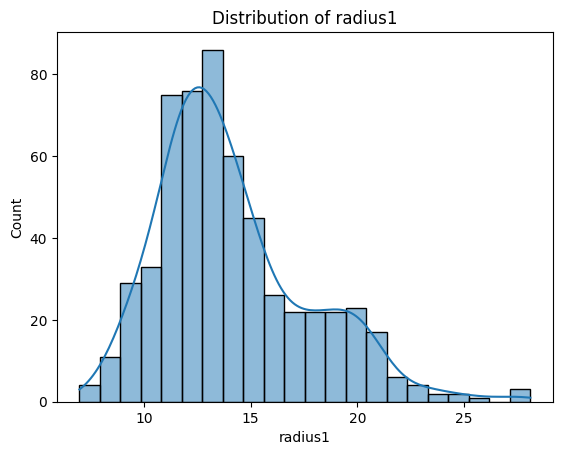

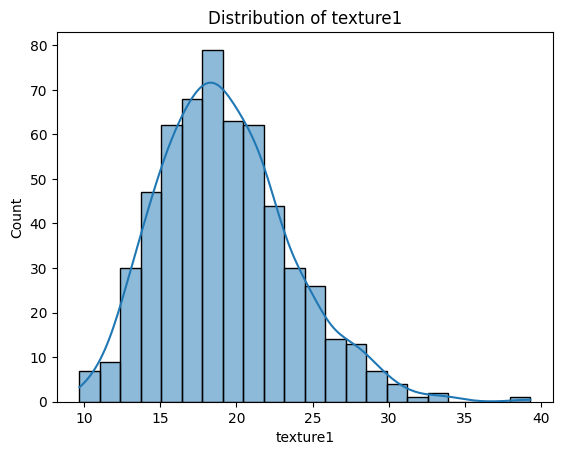

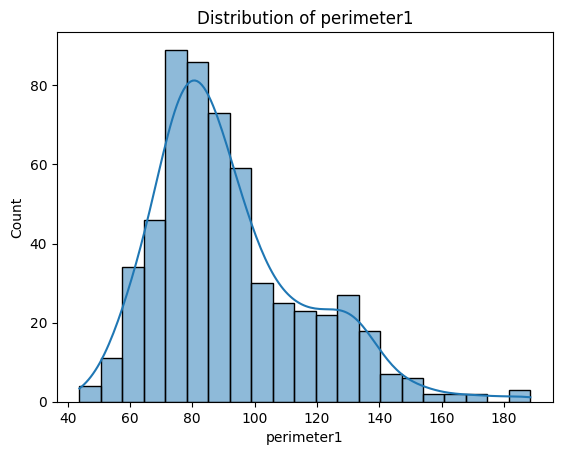

In [7]:

# Updated list of features to plot based on actual column names
features_to_plot = ['radius1', 'texture1', 'perimeter1']  

# Visualize the distribution of some features
for feature in features_to_plot:
    if feature in data.columns:
        plt.figure()
        sns.histplot(data[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()
    else:
        print(f"Feature '{feature}' not found in data.")

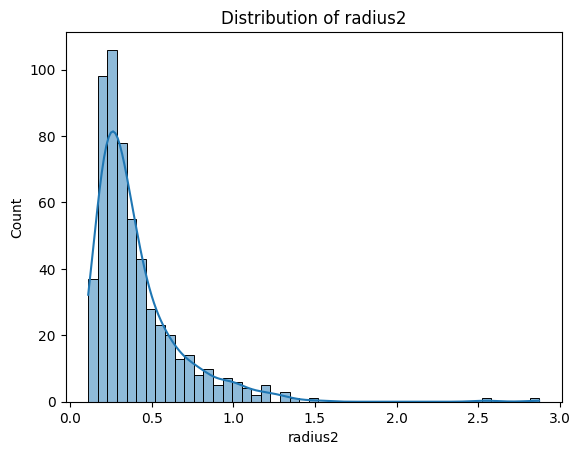

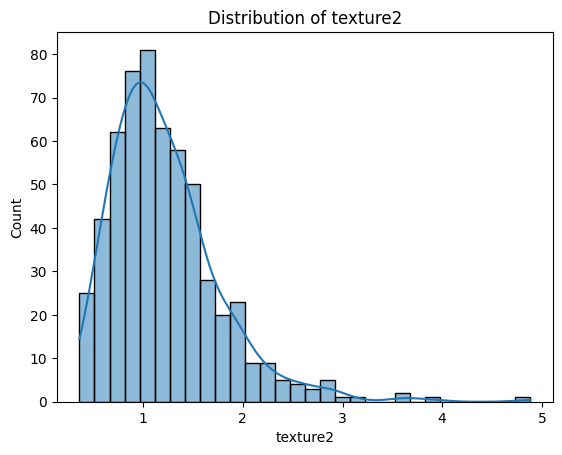

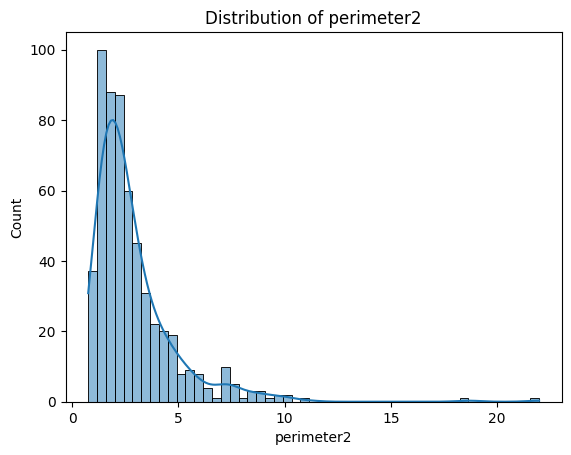

In [8]:
features_to_plot = ['radius2', 'texture2', 'perimeter2']  

for feature in features_to_plot:
    if feature in data.columns:
        plt.figure()
        sns.histplot(data[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()
    else:
        print(f"Feature '{feature}' not found in data.")

In [9]:
# Define features and target
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df_X_train = pd.DataFrame(X_train, columns=X.columns)
df_X_test = pd.DataFrame(X_test, columns=X.columns)
df_y_train = pd.DataFrame(y_train).reset_index(drop=True)
df_y_test = pd.DataFrame(y_test).reset_index(drop=True)


df_y_train.columns = ['Diagnosis']
df_y_test.columns = ['Diagnosis']


df_X_train.to_csv('X_train.csv', index=False)
df_X_test.to_csv('X_test.csv', index=False)
df_y_train.to_csv('y_train.csv', index=False)
df_y_test.to_csv('y_test.csv', index=False)

print("Data has been successfully split and saved.")


Data has been successfully split and saved.
